# Data Exploration

In [ ]:
%matplotlib inline
!pip install --upgrade pip
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
! pip install -q scikit-plot
import scikitplot as skplt
import pickle


     |████████████████████████████████| 1.5MB 11.2MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


**Data Import**

In [ ]:
#gender
import pandas as pd
! wget https://raw.githubusercontent.com/rohitzaman/SmotedDatasets/main/smoted_gender.csv
# ! wget https://raw.githubusercontent.com/Sadekeen20/One-Source-To-Detect-Them-All/refs/heads/main/dataset/smoted_age.csv
# ! wget https://raw.githubusercontent.com/Sadekeen20/One-Source-To-Detect-Them-All/refs/heads/main/dataset/smoted_emotion.csv

df = pd.read_csv("smoted_gender.csv")
# df = pd.read_csv("smoted_age.csv")
# df = pd.read_csv("smoted_emotion.csv")


--2021-03-03 18:14:28--  https://raw.githubusercontent.com/rohitzaman/SmotedDatasets/main/smoted_gender.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1938972 (1.8M) [text/plain]
Saving to: ‘smoted_gender.csv’

smoted_gender.csv   100%[===================>]   1.85M  --.-KB/s    in 0.09s   

2021-03-03 18:14:29 (21.6 MB/s) - ‘smoted_gender.csv’ saved [1938972/1938972]



In [ ]:
df=df[['meanfreq','sd','median','Q25','Q75','IQR','skew','kurt','sp.ent','sfm','mode','centroid','meanfun','minfun','maxfun','meandom','mindom','maxdom','dfrange','modindx','label']]
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.133338,0.069304,0.107668,0.089192,0.195267,0.106075,3.043456,13.694173,0.929512,0.627872,0.086962,0.133338,0.121968,0.047337,0.277457,0.822656,0.0,4.687500,4.687500,0.076296,male
1,0.137433,0.058518,0.112037,0.092841,0.200079,0.107238,2.807995,12.776650,0.911080,0.478175,0.101332,0.137433,0.111204,0.047151,0.277457,1.313384,0.0,6.046875,6.046875,0.135811,male
2,0.142227,0.065447,0.112242,0.093455,0.202909,0.109455,2.380899,9.942833,0.936040,0.557276,0.106545,0.142227,0.118711,0.047013,0.275862,0.593750,0.0,6.539062,6.539062,0.096102,male
3,0.133325,0.072849,0.113360,0.082861,0.203753,0.120892,1.904123,7.799218,0.958362,0.708279,0.108583,0.133325,0.116200,0.047105,0.279070,0.424922,0.0,5.812500,5.812500,0.081880,male
4,0.130487,0.070407,0.113418,0.076098,0.196188,0.120089,1.820873,8.561101,0.969568,0.778489,0.101534,0.130487,0.114802,0.047151,0.279070,0.198070,0.0,1.078125,1.078125,0.131579,male


In [ ]:
df.shape

(6686, 21)

**Train Test Split**

In [ ]:
X = df.loc[:, df.columns != 'label']
y=df['label']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
evaluation = pd.DataFrame({'Model': [],
                           'Accuracy(train)':[],
                           'Precision(train)':[],
                           'Recall(train)':[],
                           'F1_score(train)':[],
                           'Accuracy(test)':[],
                           'Precision(test)':[],
                           'Recalll(test)':[],
                           'F1_score(test)':[]})

evaluation2 = pd.DataFrame({'Model': [],
                           'Test':[],
                           '1':[],
                           '2':[],
                           '3':[],
                           '4':[],
                           '5':[],
                           '6':[],
                           '7':[],
                           '8':[],
                           '9':[],
                           '10':[],
                           'Mean':[]})

In [ ]:
features = list(df.columns.values)

In [ ]:
features

['meanfreq',
 'sd',
 'median',
 'Q25',
 'Q75',
 'IQR',
 'skew',
 'kurt',
 'sp.ent',
 'sfm',
 'mode',
 'centroid',
 'meanfun',
 'minfun',
 'maxfun',
 'meandom',
 'mindom',
 'maxdom',
 'dfrange',
 'modindx',
 'label']

In [ ]:
# import numpy as np
# from sklearn import linear_model
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn import metrics
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# pickle.dump(scaler, open('scaler.pkl','wb'))

# **AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
clf = AdaBoostClassifier(n_estimators=895, random_state=500)
clf.fit(X_train, y_train)

acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['ADABOOST',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)


complex_model_1=clf

cv_train_acc=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='accuracy')
cv_train_acc_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='accuracy').mean(),'.3f'))

cv_train_pre=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='precision_macro')
cv_train_pre_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='precision_macro').mean(),'.3f'))

cv_train_re=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='recall_macro')
cv_train_re_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='recall_macro').mean(),'.3f'))

cv_train_f1=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='f1_macro')
cv_train_f1_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='f1_macro').mean()

cv_test_acc=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='accuracy')
cv_test_acc_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='accuracy').mean()

cv_test_pre=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='precision_macro')
cv_test_pre_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='precision_macro').mean()

cv_test_re=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='recall_macro')
cv_test_re_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='recall_macro').mean()

cv_test_f1=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='f1_macro')
cv_test_f1_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='f1_macro').mean()


r = evaluation2.shape[0]
evaluation2.loc[r] = ['AdaBoost','Train accuracy',float(format(cv_train_acc[0],'.3f')),float(format(cv_train_acc[1],'.3f')),float(format(cv_train_acc[2],'.3f')),float(format(cv_train_acc[3],'.3f')),float(format(cv_train_acc[4],'.3f')),float(format(cv_train_acc[5],'.3f')),float(format(cv_train_acc[6],'.3f')),float(format(cv_train_acc[7],'.3f')),float(format(cv_train_acc[8],'.3f')),float(format(cv_train_acc[9],'.3f')),float(format(cv_train_acc_m,'.3f'))]
evaluation2.loc[r+1] = ['AdaBoost','Train precision',float(format(cv_train_pre[0],'.3f')),float(format(cv_train_pre[1],'.3f')),float(format(cv_train_pre[2],'.3f')),float(format(cv_train_pre[3],'.3f')),float(format(cv_train_pre[4],'.3f')),float(format(cv_train_pre[5],'.3f')),float(format(cv_train_pre[6],'.3f')),float(format(cv_train_pre[7],'.3f')),float(format(cv_train_pre[8],'.3f')),float(format(cv_train_pre[9],'.3f')),float(format(cv_train_pre_m,'.3f'))]
evaluation2.loc[r+2] = ['AdaBoost','Train recall',float(format(cv_train_re[0],'.3f')),float(format(cv_train_re[1],'.3f')),float(format(cv_train_re[2],'.3f')),float(format(cv_train_re[3],'.3f')),float(format(cv_train_re[4],'.3f')),float(format(cv_train_re[5],'.3f')),float(format(cv_train_re[6],'.3f')),float(format(cv_train_re[7],'.3f')),float(format(cv_train_re[8],'.3f')),float(format(cv_train_re[9],'.3f')),float(format(cv_train_re_m,'.3f'))]
evaluation2.loc[r+3] = ['AdaBoost','Train f1_score',float(format(cv_train_f1[0],'.3f')),float(format(cv_train_f1[1],'.3f')),float(format(cv_train_f1[2],'.3f')),float(format(cv_train_f1[3],'.3f')),float(format(cv_train_f1[4],'.3f')),float(format(cv_train_f1[5],'.3f')),float(format(cv_train_f1[6],'.3f')),float(format(cv_train_f1[7],'.3f')),float(format(cv_train_f1[8],'.3f')),float(format(cv_train_f1[9],'.3f')),float(format(cv_train_f1_m,'.3f'))]
evaluation2.loc[r+4] = ['AdaBoost','Test accuracy',float(format(cv_test_acc[0],'.3f')),float(format(cv_test_acc[1],'.3f')),float(format(cv_test_acc[2],'.3f')),float(format(cv_test_acc[3],'.3f')),float(format(cv_test_acc[4],'.3f')),float(format(cv_test_acc[5],'.3f')),float(format(cv_test_acc[6],'.3f')),float(format(cv_test_acc[7],'.3f')),float(format(cv_test_acc[8],'.3f')),float(format(cv_test_acc[9],'.3f')),float(format(cv_test_acc_m,'.3f'))]
evaluation2.loc[r+5] = ['AdaBoost','Test precision',float(format(cv_test_pre[0],'.3f')),float(format(cv_test_pre[1],'.3f')),float(format(cv_test_pre[2],'.3f')),float(format(cv_test_pre[3],'.3f')),float(format(cv_test_pre[4],'.3f')),float(format(cv_test_pre[5],'.3f')),float(format(cv_test_pre[6],'.3f')),float(format(cv_test_pre[7],'.3f')),float(format(cv_test_pre[8],'.3f')),float(format(cv_test_pre[9],'.3f')),float(format(cv_test_pre_m,'.3f'))]
evaluation2.loc[r+6] = ['AdaBoost','Test recall',float(format(cv_test_re[0],'.3f')),float(format(cv_test_re[1],'.3f')),float(format(cv_test_re[2],'.3f')),float(format(cv_test_re[3],'.3f')),float(format(cv_test_re[4],'.3f')),float(format(cv_test_re[5],'.3f')),float(format(cv_test_re[6],'.3f')),float(format(cv_test_re[7],'.3f')),float(format(cv_test_re[8],'.3f')),float(format(cv_test_re[9],'.3f')),float(format(cv_test_re_m,'.3f'))]
evaluation2.loc[r+7] = ['AdaBoost','Train f1_score',float(format(cv_test_f1[0],'.3f')),float(format(cv_test_f1[1],'.3f')),float(format(cv_test_f1[2],'.3f')),float(format(cv_test_f1[3],'.3f')),float(format(cv_test_f1[4],'.3f')),float(format(cv_test_f1[5],'.3f')),float(format(cv_test_f1[6],'.3f')),float(format(cv_test_f1[7],'.3f')),float(format(cv_test_f1[8],'.3f')),float(format(cv_test_f1[9],'.3f')),float(format(cv_test_f1_m,'.3f')) ]

In [ ]:
# pickle.dump(complex_model_1, open('bolt_ab_c.pkl','wb'))

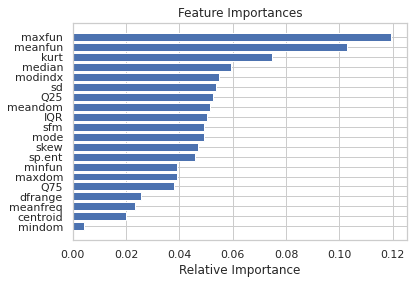

[0.02346369 0.05363128 0.05921788 0.05251397 0.03798883 0.05027933
 0.04692737 0.07486034 0.04581006 0.04916201 0.04916201 0.02011173
 0.1027933  0.03910615 0.11955307 0.05139665 0.00446927 0.03910615
 0.02569832 0.0547486 ]


In [ ]:
importances = clf.feature_importances_
import numpy as np
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)

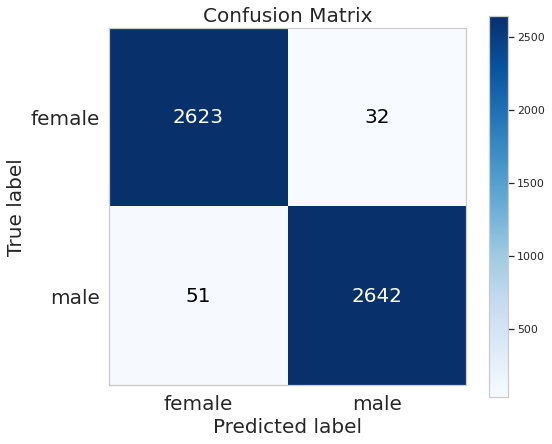

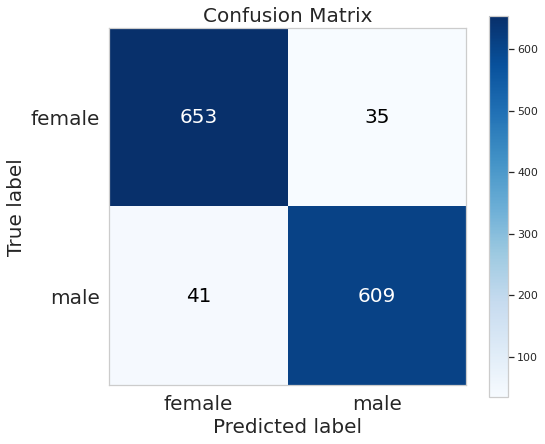

In [ ]:
p=y_train
q=y_test
#y_train=y_train.replace([0,1,2], ["B","N","SP"])
pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)

#pred_train=pred_train.replace([0,1,2], ["B","N","SP"])

pred_test=clf.predict(X_test)
#y_test=y_test.replace([0,1,2], ["B","N","SP"])
pred_test=pd.DataFrame(pred_test)

#pred_test=pred_test.replace([0,1,2], ["B","N","SP"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )
y_train=p
y_test=q

# **CATBOOST CLASSIFIER**

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=1000, 
    learning_rate=0.1, 
    #verbose=5,
    #loss_function='CrossEntropy'
)
clf.fit(X_train, y_train)

acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['CATBOOST',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)





complex_model_1=clf

cv_train_acc=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='accuracy')
cv_train_acc_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='accuracy').mean(),'.3f'))

cv_train_pre=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='precision_macro')
cv_train_pre_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='precision_macro').mean(),'.3f'))

cv_train_re=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='recall_macro')
cv_train_re_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='recall_macro').mean(),'.3f'))

cv_train_f1=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='f1_macro')
cv_train_f1_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='f1_macro').mean()

cv_test_acc=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='accuracy')
cv_test_acc_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='accuracy').mean()

cv_test_pre=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='precision_macro')
cv_test_pre_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='precision_macro').mean()

cv_test_re=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='recall_macro')
cv_test_re_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='recall_macro').mean()

cv_test_f1=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='f1_macro')
cv_test_f1_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='f1_macro').mean()


r = evaluation2.shape[0]
evaluation2.loc[r] = ['CatBoost','Train accuracy',float(format(cv_train_acc[0],'.3f')),float(format(cv_train_acc[1],'.3f')),float(format(cv_train_acc[2],'.3f')),float(format(cv_train_acc[3],'.3f')),float(format(cv_train_acc[4],'.3f')),float(format(cv_train_acc[5],'.3f')),float(format(cv_train_acc[6],'.3f')),float(format(cv_train_acc[7],'.3f')),float(format(cv_train_acc[8],'.3f')),float(format(cv_train_acc[9],'.3f')),float(format(cv_train_acc_m,'.3f'))]
evaluation2.loc[r+1] = ['CatBoost','Train precision',float(format(cv_train_pre[0],'.3f')),float(format(cv_train_pre[1],'.3f')),float(format(cv_train_pre[2],'.3f')),float(format(cv_train_pre[3],'.3f')),float(format(cv_train_pre[4],'.3f')),float(format(cv_train_pre[5],'.3f')),float(format(cv_train_pre[6],'.3f')),float(format(cv_train_pre[7],'.3f')),float(format(cv_train_pre[8],'.3f')),float(format(cv_train_pre[9],'.3f')),float(format(cv_train_pre_m,'.3f'))]
evaluation2.loc[r+2] = ['CatBoost','Train recall',float(format(cv_train_re[0],'.3f')),float(format(cv_train_re[1],'.3f')),float(format(cv_train_re[2],'.3f')),float(format(cv_train_re[3],'.3f')),float(format(cv_train_re[4],'.3f')),float(format(cv_train_re[5],'.3f')),float(format(cv_train_re[6],'.3f')),float(format(cv_train_re[7],'.3f')),float(format(cv_train_re[8],'.3f')),float(format(cv_train_re[9],'.3f')),float(format(cv_train_re_m,'.3f'))]
evaluation2.loc[r+3] = ['CatBoost','Train f1_score',float(format(cv_train_f1[0],'.3f')),float(format(cv_train_f1[1],'.3f')),float(format(cv_train_f1[2],'.3f')),float(format(cv_train_f1[3],'.3f')),float(format(cv_train_f1[4],'.3f')),float(format(cv_train_f1[5],'.3f')),float(format(cv_train_f1[6],'.3f')),float(format(cv_train_f1[7],'.3f')),float(format(cv_train_f1[8],'.3f')),float(format(cv_train_f1[9],'.3f')),float(format(cv_train_f1_m,'.3f'))]
evaluation2.loc[r+4] = ['CatBoost','Test accuracy',float(format(cv_test_acc[0],'.3f')),float(format(cv_test_acc[1],'.3f')),float(format(cv_test_acc[2],'.3f')),float(format(cv_test_acc[3],'.3f')),float(format(cv_test_acc[4],'.3f')),float(format(cv_test_acc[5],'.3f')),float(format(cv_test_acc[6],'.3f')),float(format(cv_test_acc[7],'.3f')),float(format(cv_test_acc[8],'.3f')),float(format(cv_test_acc[9],'.3f')),float(format(cv_test_acc_m,'.3f'))]
evaluation2.loc[r+5] = ['CatBoost','Test precision',float(format(cv_test_pre[0],'.3f')),float(format(cv_test_pre[1],'.3f')),float(format(cv_test_pre[2],'.3f')),float(format(cv_test_pre[3],'.3f')),float(format(cv_test_pre[4],'.3f')),float(format(cv_test_pre[5],'.3f')),float(format(cv_test_pre[6],'.3f')),float(format(cv_test_pre[7],'.3f')),float(format(cv_test_pre[8],'.3f')),float(format(cv_test_pre[9],'.3f')),float(format(cv_test_pre_m,'.3f'))]
evaluation2.loc[r+6] = ['CatBoost','Test recall',float(format(cv_test_re[0],'.3f')),float(format(cv_test_re[1],'.3f')),float(format(cv_test_re[2],'.3f')),float(format(cv_test_re[3],'.3f')),float(format(cv_test_re[4],'.3f')),float(format(cv_test_re[5],'.3f')),float(format(cv_test_re[6],'.3f')),float(format(cv_test_re[7],'.3f')),float(format(cv_test_re[8],'.3f')),float(format(cv_test_re[9],'.3f')),float(format(cv_test_re_m,'.3f'))]
evaluation2.loc[r+7] = ['CatBoost','Train f1_score',float(format(cv_test_f1[0],'.3f')),float(format(cv_test_f1[1],'.3f')),float(format(cv_test_f1[2],'.3f')),float(format(cv_test_f1[3],'.3f')),float(format(cv_test_f1[4],'.3f')),float(format(cv_test_f1[5],'.3f')),float(format(cv_test_f1[6],'.3f')),float(format(cv_test_f1[7],'.3f')),float(format(cv_test_f1[8],'.3f')),float(format(cv_test_f1[9],'.3f')),float(format(cv_test_f1_m,'.3f')) ]


Streaming output truncated to the last 5000 lines.
0:	learn: 0.5685905	total: 7.27ms	remaining: 7.26s
1:	learn: 0.4641277	total: 14.1ms	remaining: 7.04s
2:	learn: 0.4002154	total: 20.9ms	remaining: 6.94s
3:	learn: 0.3415436	total: 27.4ms	remaining: 6.83s
4:	learn: 0.2942414	total: 34.2ms	remaining: 6.8s
5:	learn: 0.2542612	total: 41ms	remaining: 6.79s
6:	learn: 0.2301412	total: 47.5ms	remaining: 6.74s
7:	learn: 0.2117591	total: 54.4ms	remaining: 6.74s
8:	learn: 0.1957448	total: 61ms	remaining: 6.72s
9:	learn: 0.1833609	total: 67.7ms	remaining: 6.7s
10:	learn: 0.1684910	total: 74.3ms	remaining: 6.68s
11:	learn: 0.1592858	total: 81.4ms	remaining: 6.7s
12:	learn: 0.1538682	total: 88.2ms	remaining: 6.69s
13:	learn: 0.1487136	total: 94.5ms	remaining: 6.65s
14:	learn: 0.1427576	total: 101ms	remaining: 6.62s
15:	learn: 0.1370510	total: 107ms	remaining: 6.61s
16:	learn: 0.1328765	total: 121ms	remaining: 7.02s
17:	learn: 0.1279647	total: 130ms	remaining: 7.11s
18:	learn: 0.1257517	total: 137ms	

In [ ]:
#pickle.dump(complex_model_1, open('bolt_cb_c.pkl','wb'))

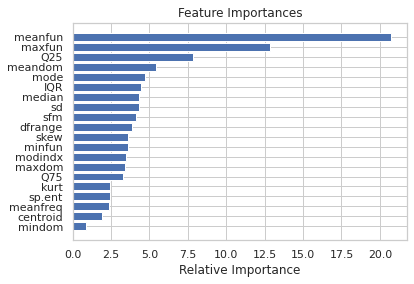

[ 2.34243819  4.32858328  4.34557866  7.81622394  3.26687059  4.45665347
  3.63247995  2.46720394  2.45224967  4.10407826  4.68879574  1.89206205
 20.74973209  3.60089982 12.8310351   5.40261516  0.84629748  3.42824323
  3.8771073   3.47085209]


In [ ]:
features = list(X.columns.values)
importances = clf.feature_importances_
import numpy as np
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)

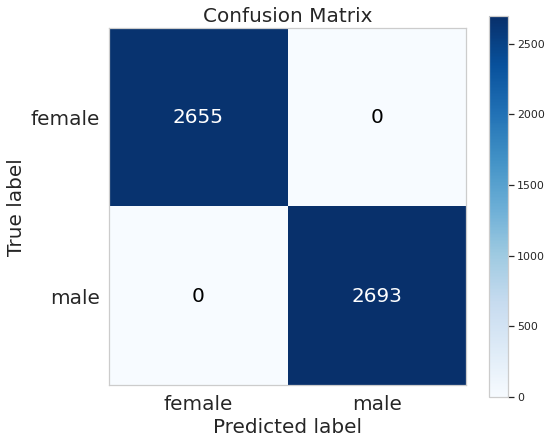

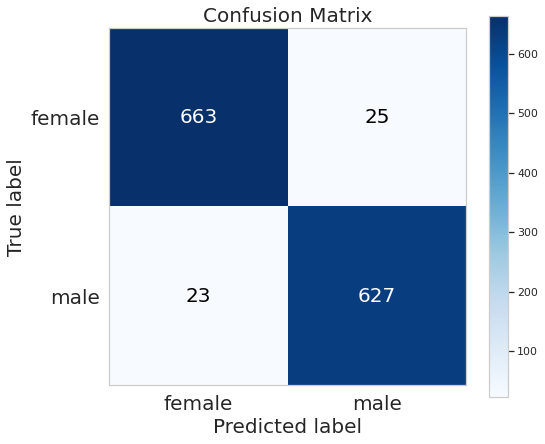

In [ ]:
p=y_train
q=y_test
#y_train=y_train.replace([0,1,2,3], ["B","N","SP","TO"])
pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)

#pred_train=pred_train.replace([0,1,2,3], ["B","N","SP","TO"])

pred_test=clf.predict(X_test)
#y_test=y_test.replace([0,1,2,3], ["B","N","SP","TO"])
pred_test=pd.DataFrame(pred_test)

#pred_test=pred_test.replace([0,1,2,3], ["B","N","SP","TO"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )
y_train=p
y_test=q

# **XGBOOST**

In [ ]:
import xgboost as xgb
clf = xgb.XGBClassifier(random_state=700)
clf.fit(X_train, y_train)

acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['XGBOOST',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

complex_model_1=clf

cv_train_acc=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='accuracy')
cv_train_acc_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='accuracy').mean(),'.3f'))

cv_train_pre=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='precision_macro')
cv_train_pre_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='precision_macro').mean(),'.3f'))

cv_train_re=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='recall_macro')
cv_train_re_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='recall_macro').mean(),'.3f'))

cv_train_f1=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='f1_macro')
cv_train_f1_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='f1_macro').mean()

cv_test_acc=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='accuracy')
cv_test_acc_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='accuracy').mean()

cv_test_pre=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='precision_macro')
cv_test_pre_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='precision_macro').mean()

cv_test_re=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='recall_macro')
cv_test_re_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='recall_macro').mean()

cv_test_f1=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='f1_macro')
cv_test_f1_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='f1_macro').mean()


r = evaluation2.shape[0]
evaluation2.loc[r] = ['XgBoost','Train accuracy',float(format(cv_train_acc[0],'.3f')),float(format(cv_train_acc[1],'.3f')),float(format(cv_train_acc[2],'.3f')),float(format(cv_train_acc[3],'.3f')),float(format(cv_train_acc[4],'.3f')),float(format(cv_train_acc[5],'.3f')),float(format(cv_train_acc[6],'.3f')),float(format(cv_train_acc[7],'.3f')),float(format(cv_train_acc[8],'.3f')),float(format(cv_train_acc[9],'.3f')),float(format(cv_train_acc_m,'.3f'))]
evaluation2.loc[r+1] = ['XgBoost','Train precision',float(format(cv_train_pre[0],'.3f')),float(format(cv_train_pre[1],'.3f')),float(format(cv_train_pre[2],'.3f')),float(format(cv_train_pre[3],'.3f')),float(format(cv_train_pre[4],'.3f')),float(format(cv_train_pre[5],'.3f')),float(format(cv_train_pre[6],'.3f')),float(format(cv_train_pre[7],'.3f')),float(format(cv_train_pre[8],'.3f')),float(format(cv_train_pre[9],'.3f')),float(format(cv_train_pre_m,'.3f'))]
evaluation2.loc[r+2] = ['XgBoost','Train recall',float(format(cv_train_re[0],'.3f')),float(format(cv_train_re[1],'.3f')),float(format(cv_train_re[2],'.3f')),float(format(cv_train_re[3],'.3f')),float(format(cv_train_re[4],'.3f')),float(format(cv_train_re[5],'.3f')),float(format(cv_train_re[6],'.3f')),float(format(cv_train_re[7],'.3f')),float(format(cv_train_re[8],'.3f')),float(format(cv_train_re[9],'.3f')),float(format(cv_train_re_m,'.3f'))]
evaluation2.loc[r+3] = ['XgBoost','Train f1_score',float(format(cv_train_f1[0],'.3f')),float(format(cv_train_f1[1],'.3f')),float(format(cv_train_f1[2],'.3f')),float(format(cv_train_f1[3],'.3f')),float(format(cv_train_f1[4],'.3f')),float(format(cv_train_f1[5],'.3f')),float(format(cv_train_f1[6],'.3f')),float(format(cv_train_f1[7],'.3f')),float(format(cv_train_f1[8],'.3f')),float(format(cv_train_f1[9],'.3f')),float(format(cv_train_f1_m,'.3f'))]
evaluation2.loc[r+4] = ['XgBoost','Test accuracy',float(format(cv_test_acc[0],'.3f')),float(format(cv_test_acc[1],'.3f')),float(format(cv_test_acc[2],'.3f')),float(format(cv_test_acc[3],'.3f')),float(format(cv_test_acc[4],'.3f')),float(format(cv_test_acc[5],'.3f')),float(format(cv_test_acc[6],'.3f')),float(format(cv_test_acc[7],'.3f')),float(format(cv_test_acc[8],'.3f')),float(format(cv_test_acc[9],'.3f')),float(format(cv_test_acc_m,'.3f'))]
evaluation2.loc[r+5] = ['XgBoost','Test precision',float(format(cv_test_pre[0],'.3f')),float(format(cv_test_pre[1],'.3f')),float(format(cv_test_pre[2],'.3f')),float(format(cv_test_pre[3],'.3f')),float(format(cv_test_pre[4],'.3f')),float(format(cv_test_pre[5],'.3f')),float(format(cv_test_pre[6],'.3f')),float(format(cv_test_pre[7],'.3f')),float(format(cv_test_pre[8],'.3f')),float(format(cv_test_pre[9],'.3f')),float(format(cv_test_pre_m,'.3f'))]
evaluation2.loc[r+6] = ['XgBoost','Test recall',float(format(cv_test_re[0],'.3f')),float(format(cv_test_re[1],'.3f')),float(format(cv_test_re[2],'.3f')),float(format(cv_test_re[3],'.3f')),float(format(cv_test_re[4],'.3f')),float(format(cv_test_re[5],'.3f')),float(format(cv_test_re[6],'.3f')),float(format(cv_test_re[7],'.3f')),float(format(cv_test_re[8],'.3f')),float(format(cv_test_re[9],'.3f')),float(format(cv_test_re_m,'.3f'))]
evaluation2.loc[r+7] = ['XgBoost','Train f1_score',float(format(cv_test_f1[0],'.3f')),float(format(cv_test_f1[1],'.3f')),float(format(cv_test_f1[2],'.3f')),float(format(cv_test_f1[3],'.3f')),float(format(cv_test_f1[4],'.3f')),float(format(cv_test_f1[5],'.3f')),float(format(cv_test_f1[6],'.3f')),float(format(cv_test_f1[7],'.3f')),float(format(cv_test_f1[8],'.3f')),float(format(cv_test_f1[9],'.3f')),float(format(cv_test_f1_m,'.3f')) ]



In [ ]:
# pickle.dump(complex_model_1, open('bolt_xb_c.pkl','wb'))

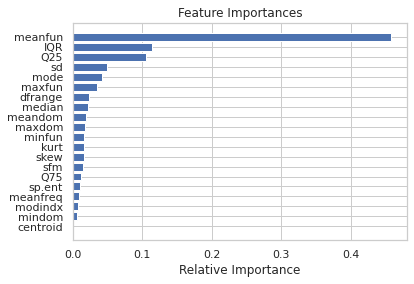

[0.00921745 0.04950308 0.02211944 0.10623244 0.01183187 0.1139062
 0.01614992 0.01704111 0.01098715 0.01567614 0.04241304 0.
 0.45841637 0.0171102  0.03507417 0.0186862  0.00605372 0.01746058
 0.02360876 0.00851232]


In [ ]:
features = list(X.columns.values)
importances = clf.feature_importances_
import numpy as np
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)

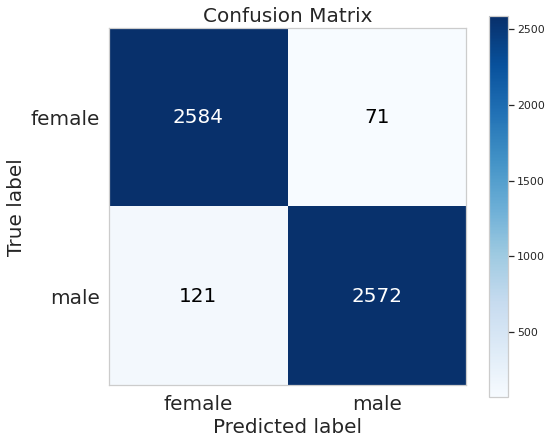

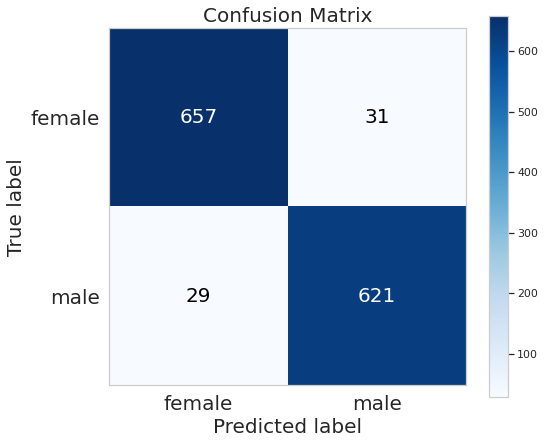

In [ ]:
p=y_train
q=y_test
#y_train=y_train.replace([0,1,2,3], ["B","N","SP","TO"])
pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)

#pred_train=pred_train.replace([0,1,2,3], ["B","N","SP","TO"])

pred_test=clf.predict(X_test)
#y_test=y_test.replace([0,1,2,3], ["B","N","SP","TO"])
pred_test=pd.DataFrame(pred_test)

#pred_test=pred_test.replace([0,1,2,3], ["B","N","SP","TO"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )
y_train=p
y_test=q

# **GRADIENT BOOSTING**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=1000, learning_rate=0.1,n_estimators=500)
clf.fit(X_train, y_train)

acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['GradientBoosting',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)


complex_model_1=clf

cv_train_acc=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='accuracy')
cv_train_acc_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='accuracy').mean(),'.3f'))

cv_train_pre=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='precision_macro')
cv_train_pre_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='precision_macro').mean(),'.3f'))

cv_train_re=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='recall_macro')
cv_train_re_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='recall_macro').mean(),'.3f'))

cv_train_f1=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='f1_macro')
cv_train_f1_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='f1_macro').mean()

cv_test_acc=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='accuracy')
cv_test_acc_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='accuracy').mean()

cv_test_pre=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='precision_macro')
cv_test_pre_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='precision_macro').mean()

cv_test_re=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='recall_macro')
cv_test_re_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='recall_macro').mean()

cv_test_f1=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='f1_macro')
cv_test_f1_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='f1_macro').mean()


r = evaluation2.shape[0]
evaluation2.loc[r] = ['GB','Train accuracy',float(format(cv_train_acc[0],'.3f')),float(format(cv_train_acc[1],'.3f')),float(format(cv_train_acc[2],'.3f')),float(format(cv_train_acc[3],'.3f')),float(format(cv_train_acc[4],'.3f')),float(format(cv_train_acc[5],'.3f')),float(format(cv_train_acc[6],'.3f')),float(format(cv_train_acc[7],'.3f')),float(format(cv_train_acc[8],'.3f')),float(format(cv_train_acc[9],'.3f')),float(format(cv_train_acc_m,'.3f'))]
evaluation2.loc[r+1] = ['GB','Train precision',float(format(cv_train_pre[0],'.3f')),float(format(cv_train_pre[1],'.3f')),float(format(cv_train_pre[2],'.3f')),float(format(cv_train_pre[3],'.3f')),float(format(cv_train_pre[4],'.3f')),float(format(cv_train_pre[5],'.3f')),float(format(cv_train_pre[6],'.3f')),float(format(cv_train_pre[7],'.3f')),float(format(cv_train_pre[8],'.3f')),float(format(cv_train_pre[9],'.3f')),float(format(cv_train_pre_m,'.3f'))]
evaluation2.loc[r+2] = ['GB','Train recall',float(format(cv_train_re[0],'.3f')),float(format(cv_train_re[1],'.3f')),float(format(cv_train_re[2],'.3f')),float(format(cv_train_re[3],'.3f')),float(format(cv_train_re[4],'.3f')),float(format(cv_train_re[5],'.3f')),float(format(cv_train_re[6],'.3f')),float(format(cv_train_re[7],'.3f')),float(format(cv_train_re[8],'.3f')),float(format(cv_train_re[9],'.3f')),float(format(cv_train_re_m,'.3f'))]
evaluation2.loc[r+3] = ['GB','Train f1_score',float(format(cv_train_f1[0],'.3f')),float(format(cv_train_f1[1],'.3f')),float(format(cv_train_f1[2],'.3f')),float(format(cv_train_f1[3],'.3f')),float(format(cv_train_f1[4],'.3f')),float(format(cv_train_f1[5],'.3f')),float(format(cv_train_f1[6],'.3f')),float(format(cv_train_f1[7],'.3f')),float(format(cv_train_f1[8],'.3f')),float(format(cv_train_f1[9],'.3f')),float(format(cv_train_f1_m,'.3f'))]
evaluation2.loc[r+4] = ['GB','Test accuracy',float(format(cv_test_acc[0],'.3f')),float(format(cv_test_acc[1],'.3f')),float(format(cv_test_acc[2],'.3f')),float(format(cv_test_acc[3],'.3f')),float(format(cv_test_acc[4],'.3f')),float(format(cv_test_acc[5],'.3f')),float(format(cv_test_acc[6],'.3f')),float(format(cv_test_acc[7],'.3f')),float(format(cv_test_acc[8],'.3f')),float(format(cv_test_acc[9],'.3f')),float(format(cv_test_acc_m,'.3f'))]
evaluation2.loc[r+5] = ['GB','Test precision',float(format(cv_test_pre[0],'.3f')),float(format(cv_test_pre[1],'.3f')),float(format(cv_test_pre[2],'.3f')),float(format(cv_test_pre[3],'.3f')),float(format(cv_test_pre[4],'.3f')),float(format(cv_test_pre[5],'.3f')),float(format(cv_test_pre[6],'.3f')),float(format(cv_test_pre[7],'.3f')),float(format(cv_test_pre[8],'.3f')),float(format(cv_test_pre[9],'.3f')),float(format(cv_test_pre_m,'.3f'))]
evaluation2.loc[r+6] = ['GB','Test recall',float(format(cv_test_re[0],'.3f')),float(format(cv_test_re[1],'.3f')),float(format(cv_test_re[2],'.3f')),float(format(cv_test_re[3],'.3f')),float(format(cv_test_re[4],'.3f')),float(format(cv_test_re[5],'.3f')),float(format(cv_test_re[6],'.3f')),float(format(cv_test_re[7],'.3f')),float(format(cv_test_re[8],'.3f')),float(format(cv_test_re[9],'.3f')),float(format(cv_test_re_m,'.3f'))]
evaluation2.loc[r+7] = ['GB','Train f1_score',float(format(cv_test_f1[0],'.3f')),float(format(cv_test_f1[1],'.3f')),float(format(cv_test_f1[2],'.3f')),float(format(cv_test_f1[3],'.3f')),float(format(cv_test_f1[4],'.3f')),float(format(cv_test_f1[5],'.3f')),float(format(cv_test_f1[6],'.3f')),float(format(cv_test_f1[7],'.3f')),float(format(cv_test_f1[8],'.3f')),float(format(cv_test_f1[9],'.3f')),float(format(cv_test_f1_m,'.3f')) ]


In [ ]:
# pickle.dump(complex_model_1, open('bolt_gb_c.pkl','wb'))

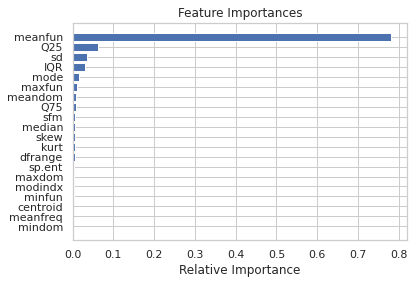

[0.00135994 0.03611423 0.00658483 0.0619381  0.00753227 0.03032501
 0.00590116 0.00515921 0.00469886 0.00662045 0.014661   0.00171619
 0.78215715 0.00322106 0.00964368 0.00778122 0.00101162 0.00456876
 0.00489082 0.00411445]


In [ ]:
features = list(X.columns.values)
importances = clf.feature_importances_
import numpy as np
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)

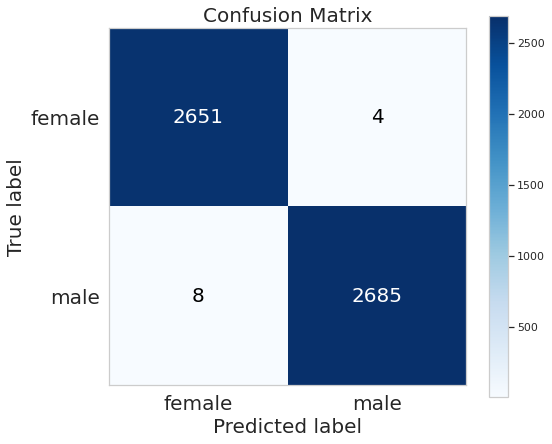

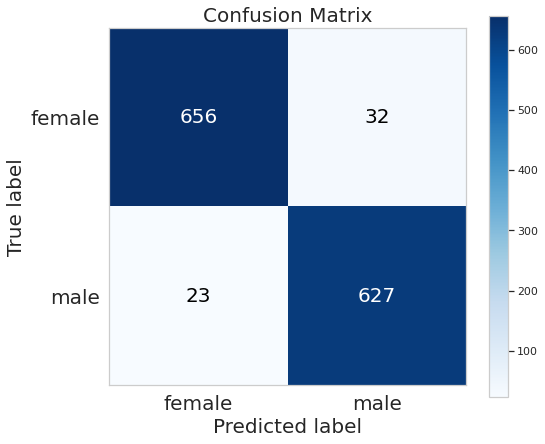

In [ ]:
p=y_train
q=y_test
#y_train=y_train.replace([0,1,2,3], ["B","N","SP","TO"])
pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)

#pred_train=pred_train.replace([0,1,2,3], ["B","N","SP","TO"])

pred_test=clf.predict(X_test)
#y_test=y_test.replace([0,1,2,3], ["B","N","SP","TO"])
pred_test=pd.DataFrame(pred_test)

#pred_test=pred_test.replace([0,1,2,3], ["B","N","SP","TO"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )
y_train=p
y_test=q

# **SVM**

In [ ]:
from sklearn import svm
clf =svm.SVC(kernel='linear',degree=100)
clf.fit(X_train, y_train)

acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['SVM',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)


complex_model_1=clf

cv_train_acc=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='accuracy')
cv_train_acc_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='accuracy').mean(),'.3f'))

cv_train_pre=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='precision_macro')
cv_train_pre_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='precision_macro').mean(),'.3f'))

cv_train_re=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='recall_macro')
cv_train_re_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='recall_macro').mean(),'.3f'))

cv_train_f1=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='f1_macro')
cv_train_f1_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='f1_macro').mean()

cv_test_acc=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='accuracy')
cv_test_acc_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='accuracy').mean()

cv_test_pre=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='precision_macro')
cv_test_pre_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='precision_macro').mean()

cv_test_re=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='recall_macro')
cv_test_re_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='recall_macro').mean()

cv_test_f1=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='f1_macro')
cv_test_f1_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='f1_macro').mean()


r = evaluation2.shape[0]
evaluation2.loc[r] = ['SVM','Train accuracy',float(format(cv_train_acc[0],'.3f')),float(format(cv_train_acc[1],'.3f')),float(format(cv_train_acc[2],'.3f')),float(format(cv_train_acc[3],'.3f')),float(format(cv_train_acc[4],'.3f')),float(format(cv_train_acc[5],'.3f')),float(format(cv_train_acc[6],'.3f')),float(format(cv_train_acc[7],'.3f')),float(format(cv_train_acc[8],'.3f')),float(format(cv_train_acc[9],'.3f')),float(format(cv_train_acc_m,'.3f'))]
evaluation2.loc[r+1] = ['SVM','Train precision',float(format(cv_train_pre[0],'.3f')),float(format(cv_train_pre[1],'.3f')),float(format(cv_train_pre[2],'.3f')),float(format(cv_train_pre[3],'.3f')),float(format(cv_train_pre[4],'.3f')),float(format(cv_train_pre[5],'.3f')),float(format(cv_train_pre[6],'.3f')),float(format(cv_train_pre[7],'.3f')),float(format(cv_train_pre[8],'.3f')),float(format(cv_train_pre[9],'.3f')),float(format(cv_train_pre_m,'.3f'))]
evaluation2.loc[r+2] = ['SVM','Train recall',float(format(cv_train_re[0],'.3f')),float(format(cv_train_re[1],'.3f')),float(format(cv_train_re[2],'.3f')),float(format(cv_train_re[3],'.3f')),float(format(cv_train_re[4],'.3f')),float(format(cv_train_re[5],'.3f')),float(format(cv_train_re[6],'.3f')),float(format(cv_train_re[7],'.3f')),float(format(cv_train_re[8],'.3f')),float(format(cv_train_re[9],'.3f')),float(format(cv_train_re_m,'.3f'))]
evaluation2.loc[r+3] = ['SVM','Train f1_score',float(format(cv_train_f1[0],'.3f')),float(format(cv_train_f1[1],'.3f')),float(format(cv_train_f1[2],'.3f')),float(format(cv_train_f1[3],'.3f')),float(format(cv_train_f1[4],'.3f')),float(format(cv_train_f1[5],'.3f')),float(format(cv_train_f1[6],'.3f')),float(format(cv_train_f1[7],'.3f')),float(format(cv_train_f1[8],'.3f')),float(format(cv_train_f1[9],'.3f')),float(format(cv_train_f1_m,'.3f'))]
evaluation2.loc[r+4] = ['SVM','Test accuracy',float(format(cv_test_acc[0],'.3f')),float(format(cv_test_acc[1],'.3f')),float(format(cv_test_acc[2],'.3f')),float(format(cv_test_acc[3],'.3f')),float(format(cv_test_acc[4],'.3f')),float(format(cv_test_acc[5],'.3f')),float(format(cv_test_acc[6],'.3f')),float(format(cv_test_acc[7],'.3f')),float(format(cv_test_acc[8],'.3f')),float(format(cv_test_acc[9],'.3f')),float(format(cv_test_acc_m,'.3f'))]
evaluation2.loc[r+5] = ['SVM','Test precision',float(format(cv_test_pre[0],'.3f')),float(format(cv_test_pre[1],'.3f')),float(format(cv_test_pre[2],'.3f')),float(format(cv_test_pre[3],'.3f')),float(format(cv_test_pre[4],'.3f')),float(format(cv_test_pre[5],'.3f')),float(format(cv_test_pre[6],'.3f')),float(format(cv_test_pre[7],'.3f')),float(format(cv_test_pre[8],'.3f')),float(format(cv_test_pre[9],'.3f')),float(format(cv_test_pre_m,'.3f'))]
evaluation2.loc[r+6] = ['SVM','Test recall',float(format(cv_test_re[0],'.3f')),float(format(cv_test_re[1],'.3f')),float(format(cv_test_re[2],'.3f')),float(format(cv_test_re[3],'.3f')),float(format(cv_test_re[4],'.3f')),float(format(cv_test_re[5],'.3f')),float(format(cv_test_re[6],'.3f')),float(format(cv_test_re[7],'.3f')),float(format(cv_test_re[8],'.3f')),float(format(cv_test_re[9],'.3f')),float(format(cv_test_re_m,'.3f'))]
evaluation2.loc[r+7] = ['SVM','Train f1_score',float(format(cv_test_f1[0],'.3f')),float(format(cv_test_f1[1],'.3f')),float(format(cv_test_f1[2],'.3f')),float(format(cv_test_f1[3],'.3f')),float(format(cv_test_f1[4],'.3f')),float(format(cv_test_f1[5],'.3f')),float(format(cv_test_f1[6],'.3f')),float(format(cv_test_f1[7],'.3f')),float(format(cv_test_f1[8],'.3f')),float(format(cv_test_f1[9],'.3f')),float(format(cv_test_f1_m,'.3f')) ]


In [ ]:
# pickle.dump(complex_model_1, open('bolt_svm_c.pkl','wb'))

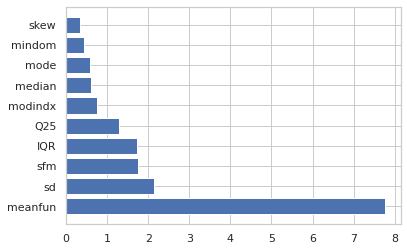

In [ ]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

# whatever your features are called

svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(clf.coef_[0]), features, top=10)

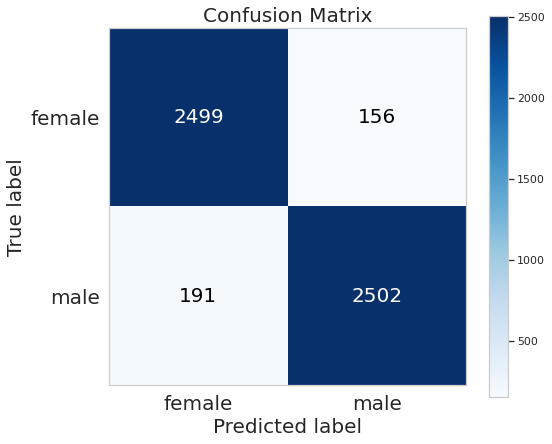

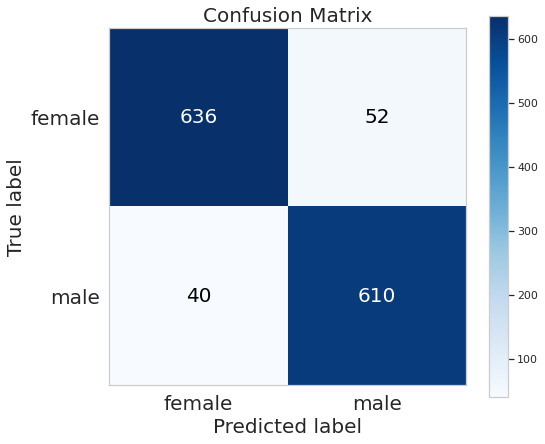

In [ ]:
p=y_train
q=y_test
#y_train=y_train.replace([0,1,2,3], ["B","N","SP","TO"])
pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)

#pred_train=pred_train.replace([0,1,2,3], ["B","N","SP","TO"])

pred_test=clf.predict(X_test)
#y_test=y_test.replace([0,1,2,3], ["B","N","SP","TO"])
pred_test=pd.DataFrame(pred_test)

#pred_test=pred_test.replace([0,1,2,3], ["B","N","SP","TO"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )
y_train=p
y_test=q

# **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf =RandomForestClassifier()
clf.fit(X_train, y_train)

acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Random Forest',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)


complex_model_1=clf

cv_train_acc=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='accuracy')
cv_train_acc_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='accuracy').mean(),'.3f'))

cv_train_pre=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='precision_macro')
cv_train_pre_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='precision_macro').mean(),'.3f'))

cv_train_re=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='recall_macro')
cv_train_re_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='recall_macro').mean(),'.3f'))

cv_train_f1=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='f1_macro')
cv_train_f1_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='f1_macro').mean()

cv_test_acc=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='accuracy')
cv_test_acc_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='accuracy').mean()

cv_test_pre=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='precision_macro')
cv_test_pre_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='precision_macro').mean()

cv_test_re=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='recall_macro')
cv_test_re_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='recall_macro').mean()

cv_test_f1=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='f1_macro')
cv_test_f1_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='f1_macro').mean()


r = evaluation2.shape[0]
evaluation2.loc[r] = ['RF','Train accuracy',float(format(cv_train_acc[0],'.3f')),float(format(cv_train_acc[1],'.3f')),float(format(cv_train_acc[2],'.3f')),float(format(cv_train_acc[3],'.3f')),float(format(cv_train_acc[4],'.3f')),float(format(cv_train_acc[5],'.3f')),float(format(cv_train_acc[6],'.3f')),float(format(cv_train_acc[7],'.3f')),float(format(cv_train_acc[8],'.3f')),float(format(cv_train_acc[9],'.3f')),float(format(cv_train_acc_m,'.3f'))]
evaluation2.loc[r+1] = ['RF','Train precision',float(format(cv_train_pre[0],'.3f')),float(format(cv_train_pre[1],'.3f')),float(format(cv_train_pre[2],'.3f')),float(format(cv_train_pre[3],'.3f')),float(format(cv_train_pre[4],'.3f')),float(format(cv_train_pre[5],'.3f')),float(format(cv_train_pre[6],'.3f')),float(format(cv_train_pre[7],'.3f')),float(format(cv_train_pre[8],'.3f')),float(format(cv_train_pre[9],'.3f')),float(format(cv_train_pre_m,'.3f'))]
evaluation2.loc[r+2] = ['RF','Train recall',float(format(cv_train_re[0],'.3f')),float(format(cv_train_re[1],'.3f')),float(format(cv_train_re[2],'.3f')),float(format(cv_train_re[3],'.3f')),float(format(cv_train_re[4],'.3f')),float(format(cv_train_re[5],'.3f')),float(format(cv_train_re[6],'.3f')),float(format(cv_train_re[7],'.3f')),float(format(cv_train_re[8],'.3f')),float(format(cv_train_re[9],'.3f')),float(format(cv_train_re_m,'.3f'))]
evaluation2.loc[r+3] = ['RF','Train f1_score',float(format(cv_train_f1[0],'.3f')),float(format(cv_train_f1[1],'.3f')),float(format(cv_train_f1[2],'.3f')),float(format(cv_train_f1[3],'.3f')),float(format(cv_train_f1[4],'.3f')),float(format(cv_train_f1[5],'.3f')),float(format(cv_train_f1[6],'.3f')),float(format(cv_train_f1[7],'.3f')),float(format(cv_train_f1[8],'.3f')),float(format(cv_train_f1[9],'.3f')),float(format(cv_train_f1_m,'.3f'))]
evaluation2.loc[r+4] = ['RF','Test accuracy',float(format(cv_test_acc[0],'.3f')),float(format(cv_test_acc[1],'.3f')),float(format(cv_test_acc[2],'.3f')),float(format(cv_test_acc[3],'.3f')),float(format(cv_test_acc[4],'.3f')),float(format(cv_test_acc[5],'.3f')),float(format(cv_test_acc[6],'.3f')),float(format(cv_test_acc[7],'.3f')),float(format(cv_test_acc[8],'.3f')),float(format(cv_test_acc[9],'.3f')),float(format(cv_test_acc_m,'.3f'))]
evaluation2.loc[r+5] = ['RF','Test precision',float(format(cv_test_pre[0],'.3f')),float(format(cv_test_pre[1],'.3f')),float(format(cv_test_pre[2],'.3f')),float(format(cv_test_pre[3],'.3f')),float(format(cv_test_pre[4],'.3f')),float(format(cv_test_pre[5],'.3f')),float(format(cv_test_pre[6],'.3f')),float(format(cv_test_pre[7],'.3f')),float(format(cv_test_pre[8],'.3f')),float(format(cv_test_pre[9],'.3f')),float(format(cv_test_pre_m,'.3f'))]
evaluation2.loc[r+6] = ['RF','Test recall',float(format(cv_test_re[0],'.3f')),float(format(cv_test_re[1],'.3f')),float(format(cv_test_re[2],'.3f')),float(format(cv_test_re[3],'.3f')),float(format(cv_test_re[4],'.3f')),float(format(cv_test_re[5],'.3f')),float(format(cv_test_re[6],'.3f')),float(format(cv_test_re[7],'.3f')),float(format(cv_test_re[8],'.3f')),float(format(cv_test_re[9],'.3f')),float(format(cv_test_re_m,'.3f'))]
evaluation2.loc[r+7] = ['RF','Train f1_score',float(format(cv_test_f1[0],'.3f')),float(format(cv_test_f1[1],'.3f')),float(format(cv_test_f1[2],'.3f')),float(format(cv_test_f1[3],'.3f')),float(format(cv_test_f1[4],'.3f')),float(format(cv_test_f1[5],'.3f')),float(format(cv_test_f1[6],'.3f')),float(format(cv_test_f1[7],'.3f')),float(format(cv_test_f1[8],'.3f')),float(format(cv_test_f1[9],'.3f')),float(format(cv_test_f1_m,'.3f')) ]


In [ ]:
# pickle.dump(complex_model_1, open('bolt_rf_c.pkl','wb'))

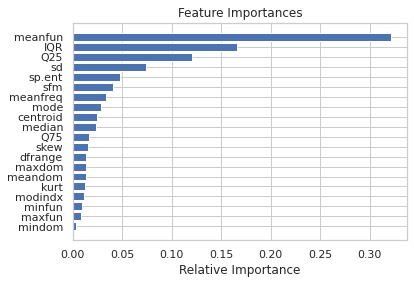

[0.03409994 0.07388864 0.0238238  0.12064046 0.01608921 0.16556663
 0.01519325 0.01286397 0.04821578 0.04035523 0.02879948 0.02510807
 0.32170141 0.00961641 0.00889003 0.01311536 0.00318672 0.01339399
 0.01345405 0.01199759]


In [ ]:

features = list(X.columns.values)
importances = clf.feature_importances_
import numpy as np
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)

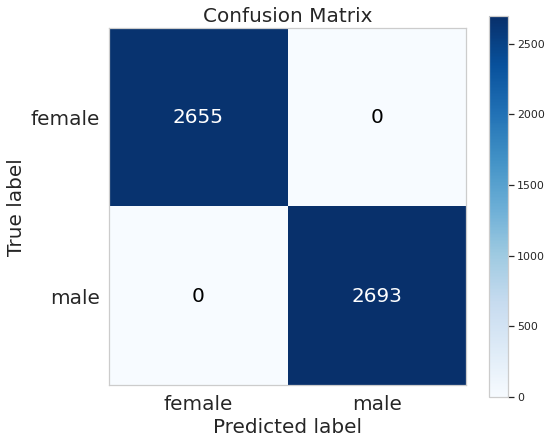

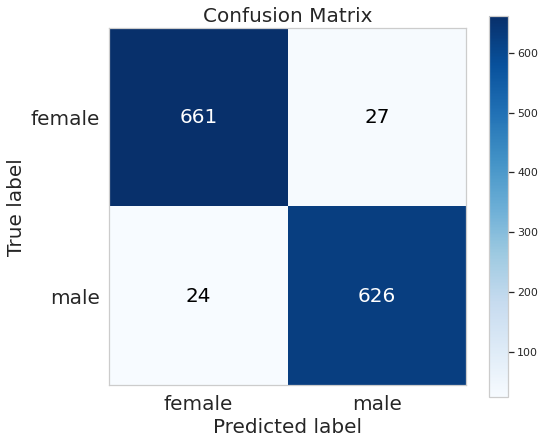

In [ ]:
p=y_train
q=y_test
#y_train=y_train.replace([0,1,2,3], ["B","N","SP","TO"])
pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)

#pred_train=pred_train.replace([0,1,2,3], ["B","N","SP","TO"])

pred_test=clf.predict(X_test)
#y_test=y_test.replace([0,1,2,3], ["B","N","SP","TO"])
pred_test=pd.DataFrame(pred_test)

#pred_test=pred_test.replace([0,1,2,3], ["B","N","SP","TO"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )
y_train=p
y_test=q

# **DECISION TREE**

In [ ]:
from sklearn import tree
clf =tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Decision Tree',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)


complex_model_1=clf

cv_train_acc=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='accuracy')
cv_train_acc_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='accuracy').mean(),'.3f'))

cv_train_pre=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='precision_macro')
cv_train_pre_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='precision_macro').mean(),'.3f'))

cv_train_re=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='recall_macro')
cv_train_re_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='recall_macro').mean(),'.3f'))

cv_train_f1=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='f1_macro')
cv_train_f1_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='f1_macro').mean()

cv_test_acc=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='accuracy')
cv_test_acc_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='accuracy').mean()

cv_test_pre=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='precision_macro')
cv_test_pre_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='precision_macro').mean()

cv_test_re=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='recall_macro')
cv_test_re_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='recall_macro').mean()

cv_test_f1=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='f1_macro')
cv_test_f1_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='f1_macro').mean()


r = evaluation2.shape[0]
evaluation2.loc[r] = ['DT','Train accuracy',float(format(cv_train_acc[0],'.3f')),float(format(cv_train_acc[1],'.3f')),float(format(cv_train_acc[2],'.3f')),float(format(cv_train_acc[3],'.3f')),float(format(cv_train_acc[4],'.3f')),float(format(cv_train_acc[5],'.3f')),float(format(cv_train_acc[6],'.3f')),float(format(cv_train_acc[7],'.3f')),float(format(cv_train_acc[8],'.3f')),float(format(cv_train_acc[9],'.3f')),float(format(cv_train_acc_m,'.3f'))]
evaluation2.loc[r+1] = ['DT','Train precision',float(format(cv_train_pre[0],'.3f')),float(format(cv_train_pre[1],'.3f')),float(format(cv_train_pre[2],'.3f')),float(format(cv_train_pre[3],'.3f')),float(format(cv_train_pre[4],'.3f')),float(format(cv_train_pre[5],'.3f')),float(format(cv_train_pre[6],'.3f')),float(format(cv_train_pre[7],'.3f')),float(format(cv_train_pre[8],'.3f')),float(format(cv_train_pre[9],'.3f')),float(format(cv_train_pre_m,'.3f'))]
evaluation2.loc[r+2] = ['DT','Train recall',float(format(cv_train_re[0],'.3f')),float(format(cv_train_re[1],'.3f')),float(format(cv_train_re[2],'.3f')),float(format(cv_train_re[3],'.3f')),float(format(cv_train_re[4],'.3f')),float(format(cv_train_re[5],'.3f')),float(format(cv_train_re[6],'.3f')),float(format(cv_train_re[7],'.3f')),float(format(cv_train_re[8],'.3f')),float(format(cv_train_re[9],'.3f')),float(format(cv_train_re_m,'.3f'))]
evaluation2.loc[r+3] = ['DT','Train f1_score',float(format(cv_train_f1[0],'.3f')),float(format(cv_train_f1[1],'.3f')),float(format(cv_train_f1[2],'.3f')),float(format(cv_train_f1[3],'.3f')),float(format(cv_train_f1[4],'.3f')),float(format(cv_train_f1[5],'.3f')),float(format(cv_train_f1[6],'.3f')),float(format(cv_train_f1[7],'.3f')),float(format(cv_train_f1[8],'.3f')),float(format(cv_train_f1[9],'.3f')),float(format(cv_train_f1_m,'.3f'))]
evaluation2.loc[r+4] = ['DT','Test accuracy',float(format(cv_test_acc[0],'.3f')),float(format(cv_test_acc[1],'.3f')),float(format(cv_test_acc[2],'.3f')),float(format(cv_test_acc[3],'.3f')),float(format(cv_test_acc[4],'.3f')),float(format(cv_test_acc[5],'.3f')),float(format(cv_test_acc[6],'.3f')),float(format(cv_test_acc[7],'.3f')),float(format(cv_test_acc[8],'.3f')),float(format(cv_test_acc[9],'.3f')),float(format(cv_test_acc_m,'.3f'))]
evaluation2.loc[r+5] = ['DT','Test precision',float(format(cv_test_pre[0],'.3f')),float(format(cv_test_pre[1],'.3f')),float(format(cv_test_pre[2],'.3f')),float(format(cv_test_pre[3],'.3f')),float(format(cv_test_pre[4],'.3f')),float(format(cv_test_pre[5],'.3f')),float(format(cv_test_pre[6],'.3f')),float(format(cv_test_pre[7],'.3f')),float(format(cv_test_pre[8],'.3f')),float(format(cv_test_pre[9],'.3f')),float(format(cv_test_pre_m,'.3f'))]
evaluation2.loc[r+6] = ['DT','Test recall',float(format(cv_test_re[0],'.3f')),float(format(cv_test_re[1],'.3f')),float(format(cv_test_re[2],'.3f')),float(format(cv_test_re[3],'.3f')),float(format(cv_test_re[4],'.3f')),float(format(cv_test_re[5],'.3f')),float(format(cv_test_re[6],'.3f')),float(format(cv_test_re[7],'.3f')),float(format(cv_test_re[8],'.3f')),float(format(cv_test_re[9],'.3f')),float(format(cv_test_re_m,'.3f'))]
evaluation2.loc[r+7] = ['DT','Train f1_score',float(format(cv_test_f1[0],'.3f')),float(format(cv_test_f1[1],'.3f')),float(format(cv_test_f1[2],'.3f')),float(format(cv_test_f1[3],'.3f')),float(format(cv_test_f1[4],'.3f')),float(format(cv_test_f1[5],'.3f')),float(format(cv_test_f1[6],'.3f')),float(format(cv_test_f1[7],'.3f')),float(format(cv_test_f1[8],'.3f')),float(format(cv_test_f1[9],'.3f')),float(format(cv_test_f1_m,'.3f')) ]


In [ ]:
# pickle.dump(complex_model_1, open('bolt_dt_c.pkl','wb'))

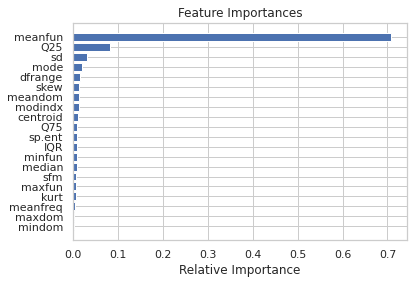

[0.00546973 0.03220832 0.00901421 0.08242495 0.01081736 0.01046472
 0.01489239 0.00684876 0.01055762 0.00794771 0.02100327 0.0111613
 0.70874296 0.01011877 0.00696667 0.01424952 0.00308921 0.00356001
 0.01696456 0.01349794]


In [ ]:
features = list(X.columns.values)
importances = clf.feature_importances_
import numpy as np
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)

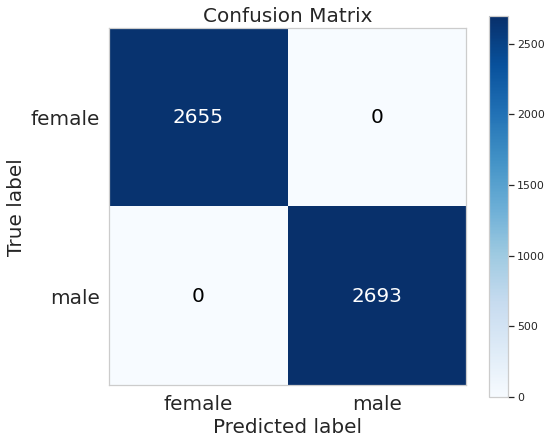

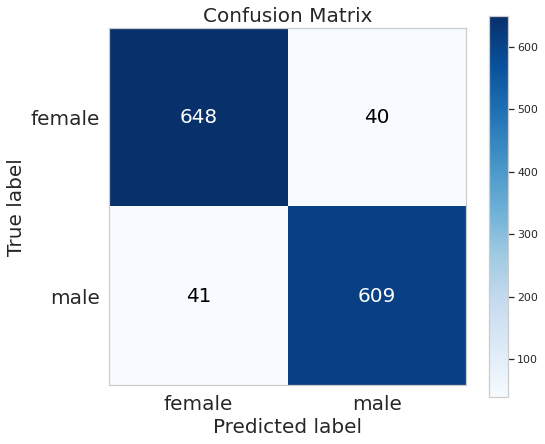

In [ ]:
p=y_train
q=y_test
#y_train=y_train.replace([0,1,2,3], ["B","N","SP","TO"])
pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)

#pred_train=pred_train.replace([0,1,2,3], ["B","N","SP","TO"])

pred_test=clf.predict(X_test)
#y_test=y_test.replace([0,1,2,3], ["B","N","SP","TO"])
pred_test=pd.DataFrame(pred_test)

#pred_test=pred_test.replace([0,1,2,3], ["B","N","SP","TO"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )
y_train=p
y_test=q

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf =KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['KNN',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)


complex_model_1=clf

cv_train_acc=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='accuracy')
cv_train_acc_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='accuracy').mean(),'.3f'))

cv_train_pre=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='precision_macro')
cv_train_pre_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='precision_macro').mean(),'.3f'))

cv_train_re=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='recall_macro')
cv_train_re_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='recall_macro').mean(),'.3f'))

cv_train_f1=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='f1_macro')
cv_train_f1_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='f1_macro').mean()

cv_test_acc=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='accuracy')
cv_test_acc_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='accuracy').mean()

cv_test_pre=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='precision_macro')
cv_test_pre_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='precision_macro').mean()

cv_test_re=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='recall_macro')
cv_test_re_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='recall_macro').mean()

cv_test_f1=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='f1_macro')
cv_test_f1_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='f1_macro').mean()


r = evaluation2.shape[0]
evaluation2.loc[r] = ['KNN','Train accuracy',float(format(cv_train_acc[0],'.3f')),float(format(cv_train_acc[1],'.3f')),float(format(cv_train_acc[2],'.3f')),float(format(cv_train_acc[3],'.3f')),float(format(cv_train_acc[4],'.3f')),float(format(cv_train_acc[5],'.3f')),float(format(cv_train_acc[6],'.3f')),float(format(cv_train_acc[7],'.3f')),float(format(cv_train_acc[8],'.3f')),float(format(cv_train_acc[9],'.3f')),float(format(cv_train_acc_m,'.3f'))]
evaluation2.loc[r+1] = ['KNN','Train precision',float(format(cv_train_pre[0],'.3f')),float(format(cv_train_pre[1],'.3f')),float(format(cv_train_pre[2],'.3f')),float(format(cv_train_pre[3],'.3f')),float(format(cv_train_pre[4],'.3f')),float(format(cv_train_pre[5],'.3f')),float(format(cv_train_pre[6],'.3f')),float(format(cv_train_pre[7],'.3f')),float(format(cv_train_pre[8],'.3f')),float(format(cv_train_pre[9],'.3f')),float(format(cv_train_pre_m,'.3f'))]
evaluation2.loc[r+2] = ['KNN','Train recall',float(format(cv_train_re[0],'.3f')),float(format(cv_train_re[1],'.3f')),float(format(cv_train_re[2],'.3f')),float(format(cv_train_re[3],'.3f')),float(format(cv_train_re[4],'.3f')),float(format(cv_train_re[5],'.3f')),float(format(cv_train_re[6],'.3f')),float(format(cv_train_re[7],'.3f')),float(format(cv_train_re[8],'.3f')),float(format(cv_train_re[9],'.3f')),float(format(cv_train_re_m,'.3f'))]
evaluation2.loc[r+3] = ['KNN','Train f1_score',float(format(cv_train_f1[0],'.3f')),float(format(cv_train_f1[1],'.3f')),float(format(cv_train_f1[2],'.3f')),float(format(cv_train_f1[3],'.3f')),float(format(cv_train_f1[4],'.3f')),float(format(cv_train_f1[5],'.3f')),float(format(cv_train_f1[6],'.3f')),float(format(cv_train_f1[7],'.3f')),float(format(cv_train_f1[8],'.3f')),float(format(cv_train_f1[9],'.3f')),float(format(cv_train_f1_m,'.3f'))]
evaluation2.loc[r+4] = ['KNN','Test accuracy',float(format(cv_test_acc[0],'.3f')),float(format(cv_test_acc[1],'.3f')),float(format(cv_test_acc[2],'.3f')),float(format(cv_test_acc[3],'.3f')),float(format(cv_test_acc[4],'.3f')),float(format(cv_test_acc[5],'.3f')),float(format(cv_test_acc[6],'.3f')),float(format(cv_test_acc[7],'.3f')),float(format(cv_test_acc[8],'.3f')),float(format(cv_test_acc[9],'.3f')),float(format(cv_test_acc_m,'.3f'))]
evaluation2.loc[r+5] = ['KNN','Test precision',float(format(cv_test_pre[0],'.3f')),float(format(cv_test_pre[1],'.3f')),float(format(cv_test_pre[2],'.3f')),float(format(cv_test_pre[3],'.3f')),float(format(cv_test_pre[4],'.3f')),float(format(cv_test_pre[5],'.3f')),float(format(cv_test_pre[6],'.3f')),float(format(cv_test_pre[7],'.3f')),float(format(cv_test_pre[8],'.3f')),float(format(cv_test_pre[9],'.3f')),float(format(cv_test_pre_m,'.3f'))]
evaluation2.loc[r+6] = ['KNN','Test recall',float(format(cv_test_re[0],'.3f')),float(format(cv_test_re[1],'.3f')),float(format(cv_test_re[2],'.3f')),float(format(cv_test_re[3],'.3f')),float(format(cv_test_re[4],'.3f')),float(format(cv_test_re[5],'.3f')),float(format(cv_test_re[6],'.3f')),float(format(cv_test_re[7],'.3f')),float(format(cv_test_re[8],'.3f')),float(format(cv_test_re[9],'.3f')),float(format(cv_test_re_m,'.3f'))]
evaluation2.loc[r+7] = ['KNN','Train f1_score',float(format(cv_test_f1[0],'.3f')),float(format(cv_test_f1[1],'.3f')),float(format(cv_test_f1[2],'.3f')),float(format(cv_test_f1[3],'.3f')),float(format(cv_test_f1[4],'.3f')),float(format(cv_test_f1[5],'.3f')),float(format(cv_test_f1[6],'.3f')),float(format(cv_test_f1[7],'.3f')),float(format(cv_test_f1[8],'.3f')),float(format(cv_test_f1[9],'.3f')),float(format(cv_test_f1_m,'.3f')) ]


In [ ]:
# pickle.dump(complex_model_1, open('bolt_knn_c.pkl','wb'))

In [ ]:
# features = list(X.columns.values)
# importances = clf.feature_importances_
# import numpy as np
# indices = np.argsort(importances)
# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), [features[i] for i in indices])
# plt.xlabel('Relative Importance')
# plt.show()

# print(importances)

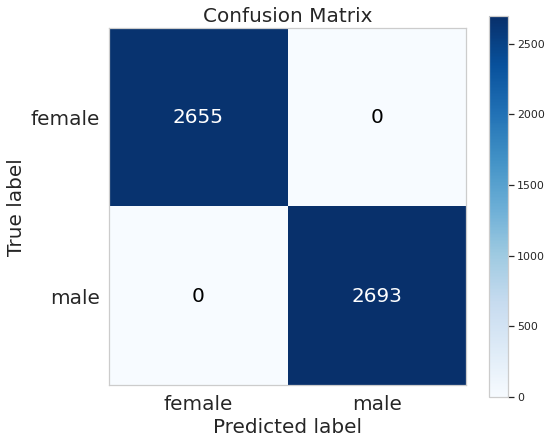

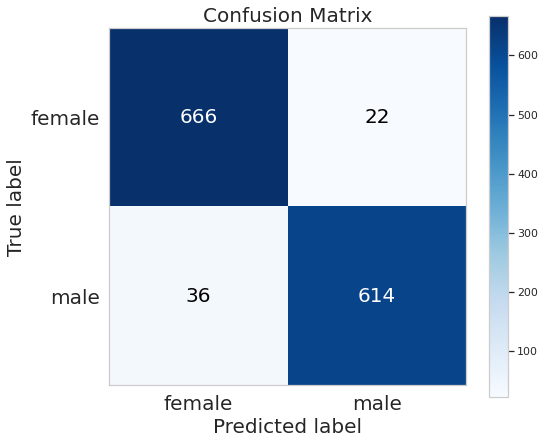

In [ ]:
p=y_train
q=y_test
#y_train=y_train.replace([0,1,2,3], ["B","N","SP","TO"])
pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)

#pred_train=pred_train.replace([0,1,2,3], ["B","N","SP","TO"])

pred_test=clf.predict(X_test)
#y_test=y_test.replace([0,1,2,3], ["B","N","SP","TO"])
pred_test=pd.DataFrame(pred_test)

#pred_test=pred_test.replace([0,1,2,3], ["B","N","SP","TO"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )
y_train=p
y_test=q

# **ANN CLASSIFIER**

In [ ]:
from sklearn.neural_network import MLPClassifier
clf =MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(16, 16), random_state=100)
# clf =MLPClassifier()
clf.fit(X_train, y_train)

acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['ANN',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)


complex_model_1=clf

cv_train_acc=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='accuracy')
cv_train_acc_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='accuracy').mean(),'.3f'))

cv_train_pre=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='precision_macro')
cv_train_pre_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='precision_macro').mean(),'.3f'))

cv_train_re=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='recall_macro')
cv_train_re_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='recall_macro').mean(),'.3f'))

cv_train_f1=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='f1_macro')
cv_train_f1_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='f1_macro').mean()

cv_test_acc=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='accuracy')
cv_test_acc_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='accuracy').mean()

cv_test_pre=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='precision_macro')
cv_test_pre_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='precision_macro').mean()

cv_test_re=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='recall_macro')
cv_test_re_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='recall_macro').mean()

cv_test_f1=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='f1_macro')
cv_test_f1_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='f1_macro').mean()


r = evaluation2.shape[0]
evaluation2.loc[r] = ['ANN','Train accuracy',float(format(cv_train_acc[0],'.3f')),float(format(cv_train_acc[1],'.3f')),float(format(cv_train_acc[2],'.3f')),float(format(cv_train_acc[3],'.3f')),float(format(cv_train_acc[4],'.3f')),float(format(cv_train_acc[5],'.3f')),float(format(cv_train_acc[6],'.3f')),float(format(cv_train_acc[7],'.3f')),float(format(cv_train_acc[8],'.3f')),float(format(cv_train_acc[9],'.3f')),float(format(cv_train_acc_m,'.3f'))]
evaluation2.loc[r+1] = ['ANN','Train precision',float(format(cv_train_pre[0],'.3f')),float(format(cv_train_pre[1],'.3f')),float(format(cv_train_pre[2],'.3f')),float(format(cv_train_pre[3],'.3f')),float(format(cv_train_pre[4],'.3f')),float(format(cv_train_pre[5],'.3f')),float(format(cv_train_pre[6],'.3f')),float(format(cv_train_pre[7],'.3f')),float(format(cv_train_pre[8],'.3f')),float(format(cv_train_pre[9],'.3f')),float(format(cv_train_pre_m,'.3f'))]
evaluation2.loc[r+2] = ['ANN','Train recall',float(format(cv_train_re[0],'.3f')),float(format(cv_train_re[1],'.3f')),float(format(cv_train_re[2],'.3f')),float(format(cv_train_re[3],'.3f')),float(format(cv_train_re[4],'.3f')),float(format(cv_train_re[5],'.3f')),float(format(cv_train_re[6],'.3f')),float(format(cv_train_re[7],'.3f')),float(format(cv_train_re[8],'.3f')),float(format(cv_train_re[9],'.3f')),float(format(cv_train_re_m,'.3f'))]
evaluation2.loc[r+3] = ['ANN','Train f1_score',float(format(cv_train_f1[0],'.3f')),float(format(cv_train_f1[1],'.3f')),float(format(cv_train_f1[2],'.3f')),float(format(cv_train_f1[3],'.3f')),float(format(cv_train_f1[4],'.3f')),float(format(cv_train_f1[5],'.3f')),float(format(cv_train_f1[6],'.3f')),float(format(cv_train_f1[7],'.3f')),float(format(cv_train_f1[8],'.3f')),float(format(cv_train_f1[9],'.3f')),float(format(cv_train_f1_m,'.3f'))]
evaluation2.loc[r+4] = ['ANN','Test accuracy',float(format(cv_test_acc[0],'.3f')),float(format(cv_test_acc[1],'.3f')),float(format(cv_test_acc[2],'.3f')),float(format(cv_test_acc[3],'.3f')),float(format(cv_test_acc[4],'.3f')),float(format(cv_test_acc[5],'.3f')),float(format(cv_test_acc[6],'.3f')),float(format(cv_test_acc[7],'.3f')),float(format(cv_test_acc[8],'.3f')),float(format(cv_test_acc[9],'.3f')),float(format(cv_test_acc_m,'.3f'))]
evaluation2.loc[r+5] = ['ANN','Test precision',float(format(cv_test_pre[0],'.3f')),float(format(cv_test_pre[1],'.3f')),float(format(cv_test_pre[2],'.3f')),float(format(cv_test_pre[3],'.3f')),float(format(cv_test_pre[4],'.3f')),float(format(cv_test_pre[5],'.3f')),float(format(cv_test_pre[6],'.3f')),float(format(cv_test_pre[7],'.3f')),float(format(cv_test_pre[8],'.3f')),float(format(cv_test_pre[9],'.3f')),float(format(cv_test_pre_m,'.3f'))]
evaluation2.loc[r+6] = ['ANN','Test recall',float(format(cv_test_re[0],'.3f')),float(format(cv_test_re[1],'.3f')),float(format(cv_test_re[2],'.3f')),float(format(cv_test_re[3],'.3f')),float(format(cv_test_re[4],'.3f')),float(format(cv_test_re[5],'.3f')),float(format(cv_test_re[6],'.3f')),float(format(cv_test_re[7],'.3f')),float(format(cv_test_re[8],'.3f')),float(format(cv_test_re[9],'.3f')),float(format(cv_test_re_m,'.3f'))]
evaluation2.loc[r+7] = ['ANN','Train f1_score',float(format(cv_test_f1[0],'.3f')),float(format(cv_test_f1[1],'.3f')),float(format(cv_test_f1[2],'.3f')),float(format(cv_test_f1[3],'.3f')),float(format(cv_test_f1[4],'.3f')),float(format(cv_test_f1[5],'.3f')),float(format(cv_test_f1[6],'.3f')),float(format(cv_test_f1[7],'.3f')),float(format(cv_test_f1[8],'.3f')),float(format(cv_test_f1[9],'.3f')),float(format(cv_test_f1_m,'.3f')) ]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

In [ ]:
# pickle.dump(complex_model_1, open('bolt_ann_c.pkl','wb'))

In [ ]:
# features = list(X.columns.values)
# importances = clf.feature_importances_
# import numpy as np
# indices = np.argsort(importances)
# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), [features[i] for i in indices])
# plt.xlabel('Relative Importance')
# plt.show()

# print(importances)

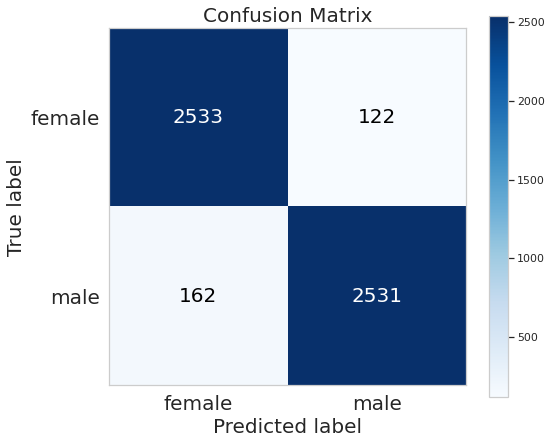

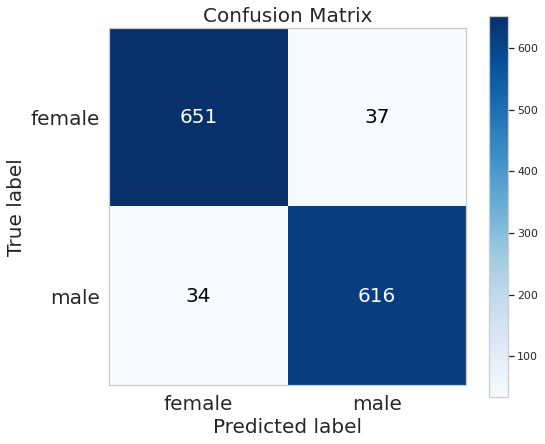

In [ ]:
p=y_train
q=y_test
#y_train=y_train.replace([0,1,2,3], ["B","N","SP","TO"])
pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)

#pred_train=pred_train.replace([0,1,2,3], ["B","N","SP","TO"])

pred_test=clf.predict(X_test)
#y_test=y_test.replace([0,1,2,3], ["B","N","SP","TO"])
pred_test=pd.DataFrame(pred_test)

#pred_test=pred_test.replace([0,1,2,3], ["B","N","SP","TO"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )
y_train=p
y_test=q

# **GAUSSIAN NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf =GaussianNB()
clf.fit(X_train, y_train)

acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Naive Bayes',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)



complex_model_1=clf

cv_train_acc=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='accuracy')
cv_train_acc_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='accuracy').mean(),'.3f'))

cv_train_pre=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='precision_macro')
cv_train_pre_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='precision_macro').mean(),'.3f'))

cv_train_re=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='recall_macro')
cv_train_re_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='recall_macro').mean(),'.3f'))

cv_train_f1=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='f1_macro')
cv_train_f1_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='f1_macro').mean()

cv_test_acc=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='accuracy')
cv_test_acc_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='accuracy').mean()

cv_test_pre=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='precision_macro')
cv_test_pre_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='precision_macro').mean()

cv_test_re=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='recall_macro')
cv_test_re_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='recall_macro').mean()

cv_test_f1=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='f1_macro')
cv_test_f1_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='f1_macro').mean()


r = evaluation2.shape[0]
evaluation2.loc[r] = ['GNB','Train accuracy',float(format(cv_train_acc[0],'.3f')),float(format(cv_train_acc[1],'.3f')),float(format(cv_train_acc[2],'.3f')),float(format(cv_train_acc[3],'.3f')),float(format(cv_train_acc[4],'.3f')),float(format(cv_train_acc[5],'.3f')),float(format(cv_train_acc[6],'.3f')),float(format(cv_train_acc[7],'.3f')),float(format(cv_train_acc[8],'.3f')),float(format(cv_train_acc[9],'.3f')),float(format(cv_train_acc_m,'.3f'))]
evaluation2.loc[r+1] = ['GNB','Train precision',float(format(cv_train_pre[0],'.3f')),float(format(cv_train_pre[1],'.3f')),float(format(cv_train_pre[2],'.3f')),float(format(cv_train_pre[3],'.3f')),float(format(cv_train_pre[4],'.3f')),float(format(cv_train_pre[5],'.3f')),float(format(cv_train_pre[6],'.3f')),float(format(cv_train_pre[7],'.3f')),float(format(cv_train_pre[8],'.3f')),float(format(cv_train_pre[9],'.3f')),float(format(cv_train_pre_m,'.3f'))]
evaluation2.loc[r+2] = ['GNB','Train recall',float(format(cv_train_re[0],'.3f')),float(format(cv_train_re[1],'.3f')),float(format(cv_train_re[2],'.3f')),float(format(cv_train_re[3],'.3f')),float(format(cv_train_re[4],'.3f')),float(format(cv_train_re[5],'.3f')),float(format(cv_train_re[6],'.3f')),float(format(cv_train_re[7],'.3f')),float(format(cv_train_re[8],'.3f')),float(format(cv_train_re[9],'.3f')),float(format(cv_train_re_m,'.3f'))]
evaluation2.loc[r+3] = ['GNB','Train f1_score',float(format(cv_train_f1[0],'.3f')),float(format(cv_train_f1[1],'.3f')),float(format(cv_train_f1[2],'.3f')),float(format(cv_train_f1[3],'.3f')),float(format(cv_train_f1[4],'.3f')),float(format(cv_train_f1[5],'.3f')),float(format(cv_train_f1[6],'.3f')),float(format(cv_train_f1[7],'.3f')),float(format(cv_train_f1[8],'.3f')),float(format(cv_train_f1[9],'.3f')),float(format(cv_train_f1_m,'.3f'))]
evaluation2.loc[r+4] = ['GNB','Test accuracy',float(format(cv_test_acc[0],'.3f')),float(format(cv_test_acc[1],'.3f')),float(format(cv_test_acc[2],'.3f')),float(format(cv_test_acc[3],'.3f')),float(format(cv_test_acc[4],'.3f')),float(format(cv_test_acc[5],'.3f')),float(format(cv_test_acc[6],'.3f')),float(format(cv_test_acc[7],'.3f')),float(format(cv_test_acc[8],'.3f')),float(format(cv_test_acc[9],'.3f')),float(format(cv_test_acc_m,'.3f'))]
evaluation2.loc[r+5] = ['GNB','Test precision',float(format(cv_test_pre[0],'.3f')),float(format(cv_test_pre[1],'.3f')),float(format(cv_test_pre[2],'.3f')),float(format(cv_test_pre[3],'.3f')),float(format(cv_test_pre[4],'.3f')),float(format(cv_test_pre[5],'.3f')),float(format(cv_test_pre[6],'.3f')),float(format(cv_test_pre[7],'.3f')),float(format(cv_test_pre[8],'.3f')),float(format(cv_test_pre[9],'.3f')),float(format(cv_test_pre_m,'.3f'))]
evaluation2.loc[r+6] = ['GNB','Test recall',float(format(cv_test_re[0],'.3f')),float(format(cv_test_re[1],'.3f')),float(format(cv_test_re[2],'.3f')),float(format(cv_test_re[3],'.3f')),float(format(cv_test_re[4],'.3f')),float(format(cv_test_re[5],'.3f')),float(format(cv_test_re[6],'.3f')),float(format(cv_test_re[7],'.3f')),float(format(cv_test_re[8],'.3f')),float(format(cv_test_re[9],'.3f')),float(format(cv_test_re_m,'.3f'))]
evaluation2.loc[r+7] = ['GNB','Train f1_score',float(format(cv_test_f1[0],'.3f')),float(format(cv_test_f1[1],'.3f')),float(format(cv_test_f1[2],'.3f')),float(format(cv_test_f1[3],'.3f')),float(format(cv_test_f1[4],'.3f')),float(format(cv_test_f1[5],'.3f')),float(format(cv_test_f1[6],'.3f')),float(format(cv_test_f1[7],'.3f')),float(format(cv_test_f1[8],'.3f')),float(format(cv_test_f1[9],'.3f')),float(format(cv_test_f1_m,'.3f')) ]


In [ ]:
# pickle.dump(complex_model_1, open('bolt_gnb_c.pkl','wb'))

In [ ]:
# features = list(X.columns.values)
# importances = clf.feature_importances_
# import numpy as np
# indices = np.argsort(importances)
# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), [features[i] for i in indices])
# plt.xlabel('Relative Importance')
# plt.show()

# print(importances)

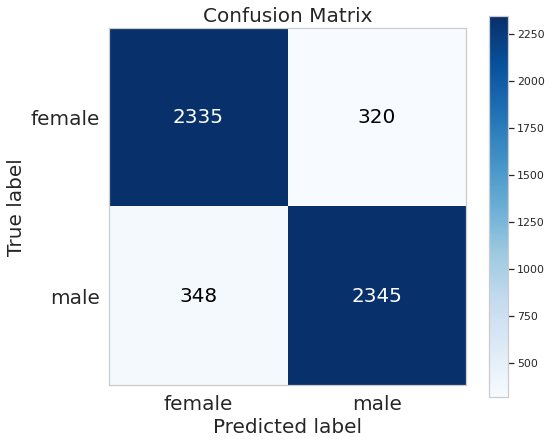

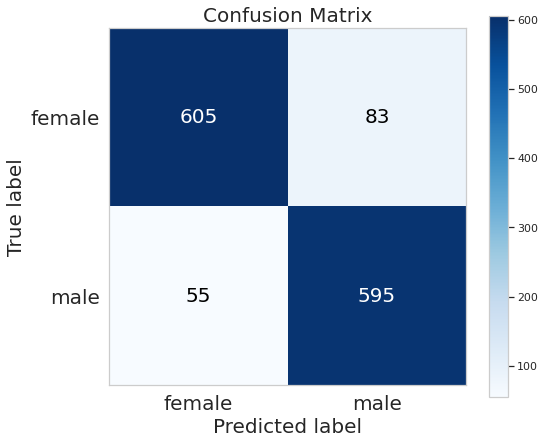

In [ ]:
p=y_train
q=y_test
#y_train=y_train.replace([0,1,2,3], ["B","N","SP","TO"])
pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)

#pred_train=pred_train.replace([0,1,2,3], ["B","N","SP","TO"])

pred_test=clf.predict(X_test)
#y_test=y_test.replace([0,1,2,3], ["B","N","SP","TO"])
pred_test=pd.DataFrame(pred_test)

#pred_test=pred_test.replace([0,1,2,3], ["B","N","SP","TO"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )
y_train=p
y_test=q

In [ ]:
evaluation.to_csv('eval_gender.csv')
evaluation2.to_csv("cross_val_results_gender.csv")

In [ ]:
# evaluation.to_csv('eval_age.csv')
# evaluation2.to_csv("cross_val_results_age.csv")

# evaluation.to_csv('eval_emotion.csv')
# evaluation2.to_csv("cross_val_results_emotion.csv")